In [1]:
# coding: utf-8

"""
This file contains the text processing functions such as Tokenizing, StopWords, Stemming ..
"""
from __future__ import unicode_literals

import os
import codecs
import pandas as pd
import re
import numpy as np
PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [9]:
os.chdir(os.path.dirname(os.path.abspath(__file__)))

NameError: name '__file__' is not defined

In [3]:
# INPUT
#root_path = PATH
input_data_path = os.path.join(PATH, "bikes_clustering", "datasets","input", "Brisbane_CityBike.json")

# OUTPUT

output_data_path = os.path.join(PATH, "bikes_clustering", "datasets","output", "prediction_location_Brisbane_CityBike.json")

In [4]:
# loading data

df = pd.read_json(input_data_path)
df.head(10)

,id,name,address,latitude,longitude,position,coordinates
0,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,-27.4823,153.029,NaN,NaN
1,91,91 - MAIN ST / DARRAGH ST,Main St / Darragh St,-27.4706,153.036,NaN,NaN
2,88,88 - SYDNEY ST FERRY TERMINAL / PARK,None,None,153.043,NaN,NaN
3,75,75 - BROWNE ST / JAMES ST,Browne St / James St,-27.4619,153.047,NaN,NaN
4,99,98 - KURILPA POINT / MONTAGUE RD,Kurilpa Point / Montague Rd,-27.4697,153.017,NaN,NaN
5,109,109 - MONTAGUE RD / SKINNER ST,Montague Rd / Skinner St,-27.4817,153.004,NaN,NaN
6,149,None,Macquarie St / Guyatt Park,-27.4936,153.001,NaN,NaN
7,139,139 - BI-CENTENNIAL BIKE WAY / LANG PDE,Bi-centennial Bike Way / Lang Pde,-27.4761,153.002,NaN,NaN
8,24,24 - SIR WILLIAM MCGREGOR DR / SIR FRED SCHONNELL,Sir William McGregor Dr / Sir Fred Schonnell,-27.494,153.012,NaN,NaN
9,117,117 - VULTURE ST / TRIBUNE ST,Vulture St / Tribune St,-27.4822,153.021,NaN,NaN


In [316]:
df.shape

(150, 7)

In [5]:
# cleaning steps #
# keeping only rows with coordinates / latitude or longitude not empty value
df_1 = df[df.coordinates.notnull() | (df.longitude.notnull() & df.latitude.notnull())]
df_1.shape

(148, 7)

In [6]:
# retrieving only Rows with valid float type in fields longitude and latitude
# after analysing the data content, we notice the noise value 'not relevant' in longitude and latitudes ==> 2 rows
import numpy as np
df_1 = df_1[df_1.longitude.apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df_1 = df_1[df_1.latitude.apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df_1.shape

(146, 7)

In [7]:
# Filling the longitude / latitude value with the value in 'coordinates' when exists and are valid
### # checking the Nan rows to replace in longitude and latitude when coordinates exists ==> creating first temporary filtrering dataframe
tmp_df = df_1[df_1.coordinates.notnull() & (df_1.longitude.isnull() | df_1.latitude.isnull())]

df_1.latitude.fillna(tmp_df.coordinates.apply(lambda x : x['latitude']),inplace=True)
df_1.longitude.fillna(tmp_df.coordinates.apply(lambda x : x['longitude']),inplace=True)
df_1.head()

,id,name,address,latitude,longitude,position,coordinates
0,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,-27.482279,153.028723,NaN,NaN
1,91,91 - MAIN ST / DARRAGH ST,Main St / Darragh St,-27.470590,153.036046,NaN,NaN
3,75,75 - BROWNE ST / JAMES ST,Browne St / James St,-27.461881,153.046986,NaN,NaN
4,99,98 - KURILPA POINT / MONTAGUE RD,Kurilpa Point / Montague Rd,-27.469658,153.016696,NaN,NaN
5,109,109 - MONTAGUE RD / SKINNER ST,Montague Rd / Skinner St,-27.481720,153.004360,NaN,NaN


In [8]:
## Filling Nan Value with valid value in "Coordinates" from 'longitude' and "latitude" fields
df_1.coordinates.fillna(df_1.apply(lambda x : {'latitude':x['latitude'],'longitude':x['longitude']},axis=1),inplace=True)
df_1.head()

,id,name,address,latitude,longitude,position,coordinates
0,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,-27.482279,153.028723,NaN,"{'latitude': -27.482279, 'longitude': 153.028723}"
1,91,91 - MAIN ST / DARRAGH ST,Main St / Darragh St,-27.470590,153.036046,NaN,"{'latitude': -27.47059, 'longitude': 153.036046}"
3,75,75 - BROWNE ST / JAMES ST,Browne St / James St,-27.461881,153.046986,NaN,"{'latitude': -27.461880999999998, 'longitude':..."
4,99,98 - KURILPA POINT / MONTAGUE RD,Kurilpa Point / Montague Rd,-27.469658,153.016696,NaN,"{'latitude': -27.469658, 'longitude': 153.016696}"
5,109,109 - MONTAGUE RD / SKINNER ST,Montague Rd / Skinner St,-27.481720,153.004360,NaN,"{'latitude': -27.48172, 'longitude': 153.00436}"


In [325]:
df_1.shape

(146, 7)

In [327]:
## Keeping only Rows with valid float type in Coordinates ==> May be escape if coordinates is not needed for our training steps
## hence the df_1 will be sufficient.
df_2 = df_1[df_1.coordinates.apply(lambda x: type(x['latitude']) in [int, np.int64, float, np.float64])]
df_2 = df_1[df_1.coordinates.apply(lambda x: type(x['longitude']) in [int, np.int64, float, np.float64])]

In [328]:
df_2.shape

(146, 7)

/home/sidoine/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


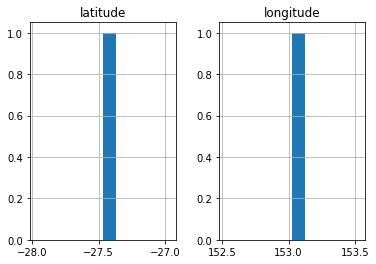

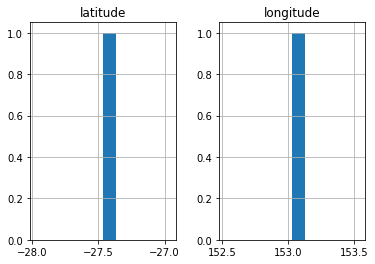

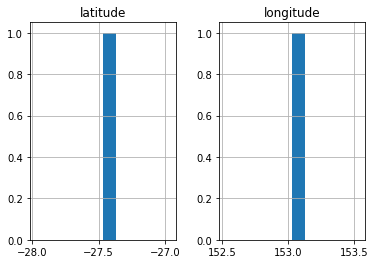

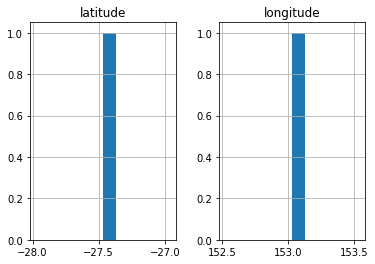

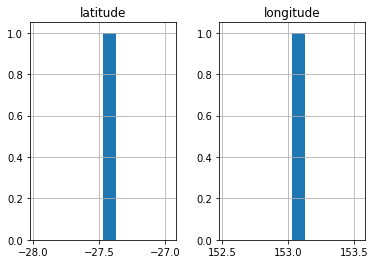

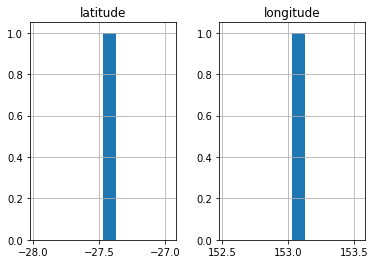

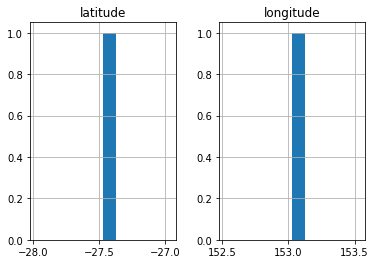

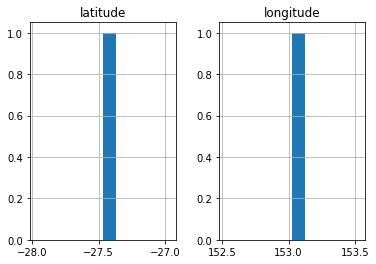

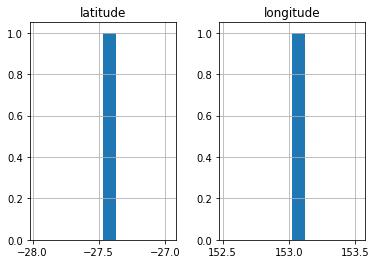

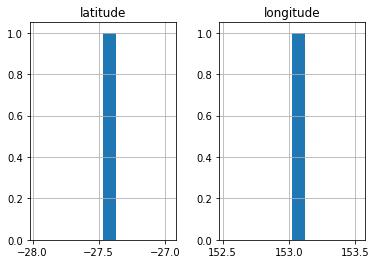

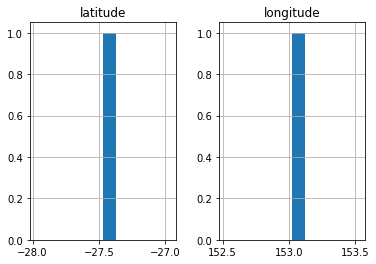

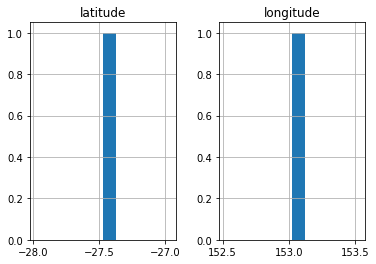

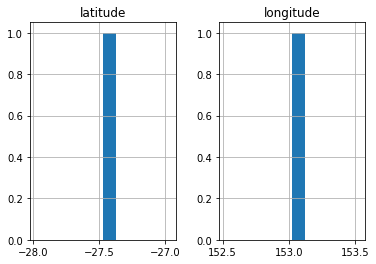

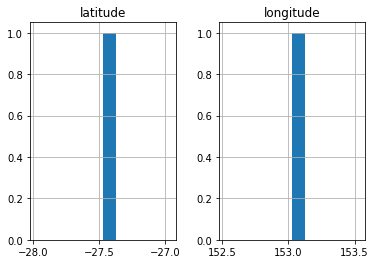

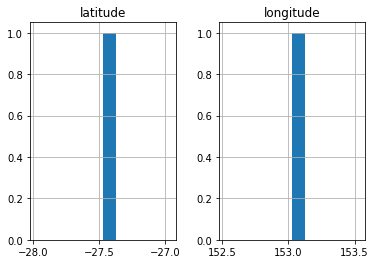

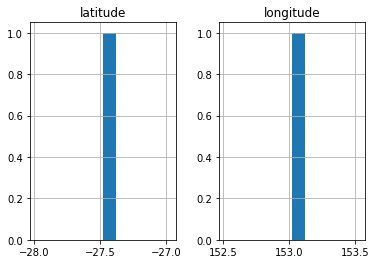

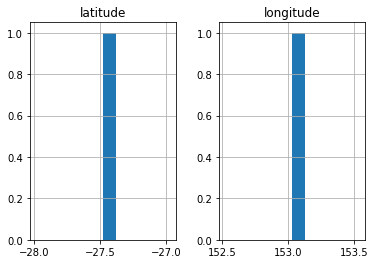

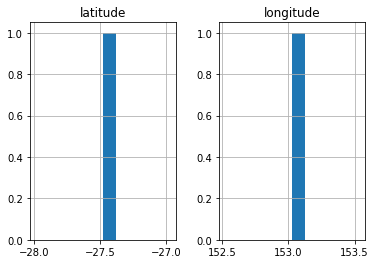

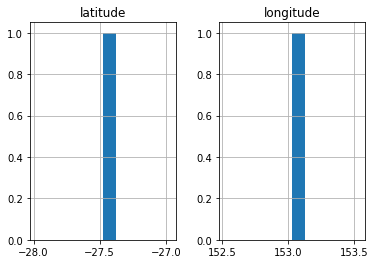

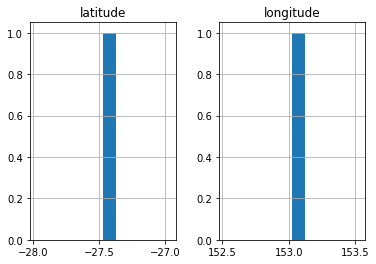

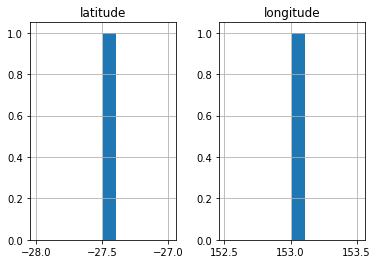

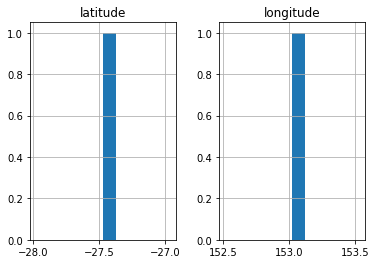

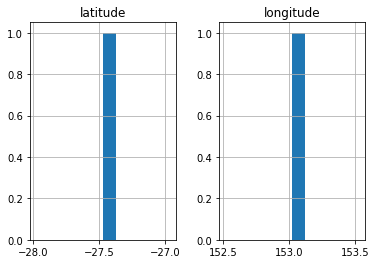

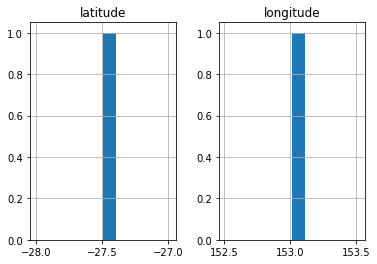

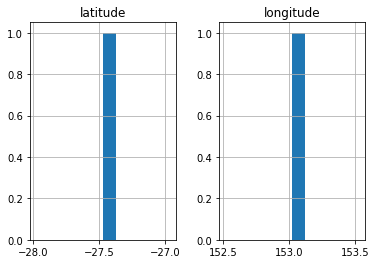

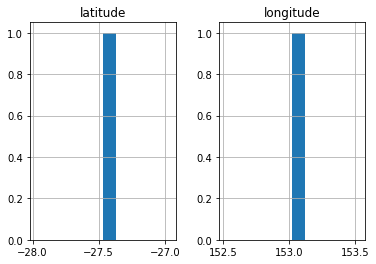

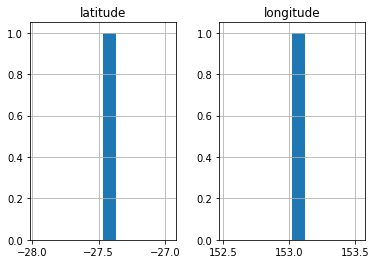

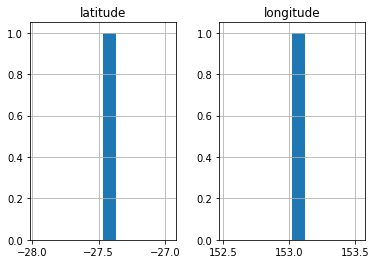

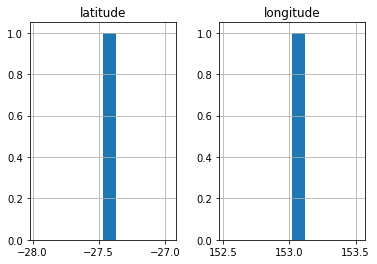

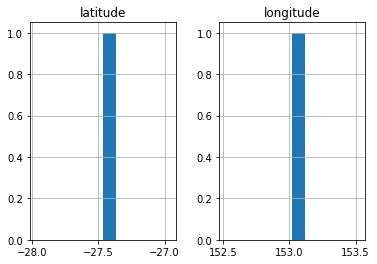

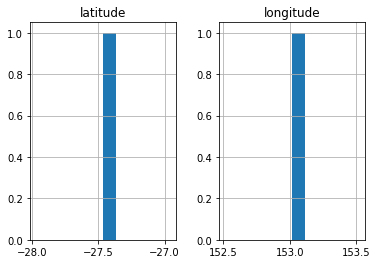

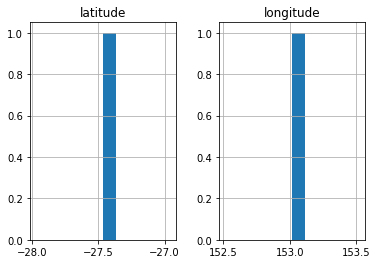

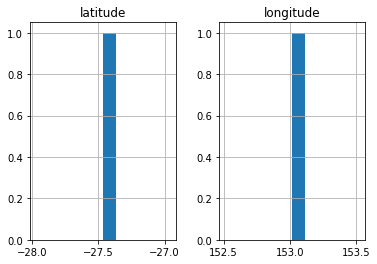

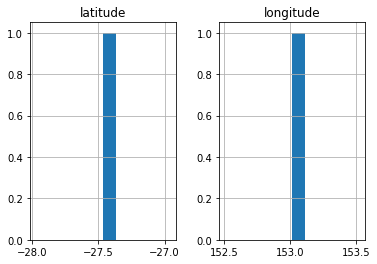

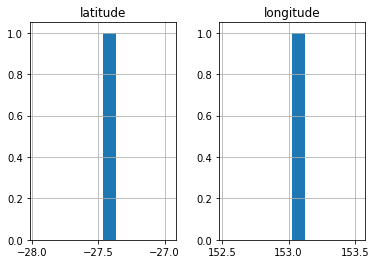

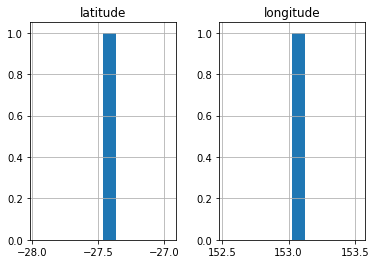

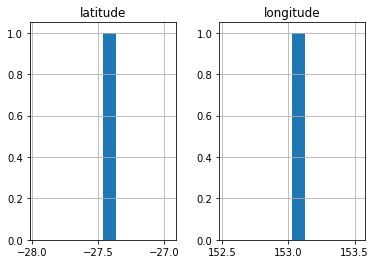

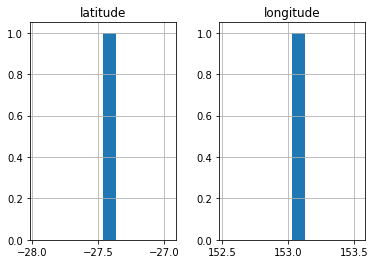

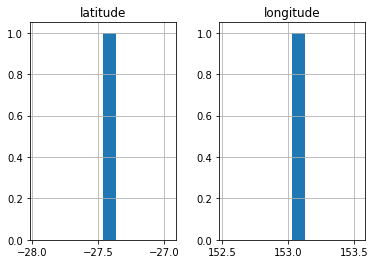

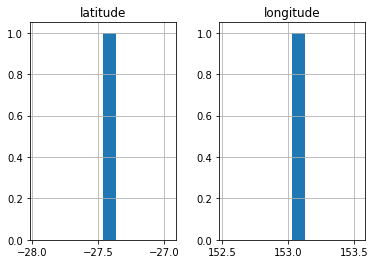

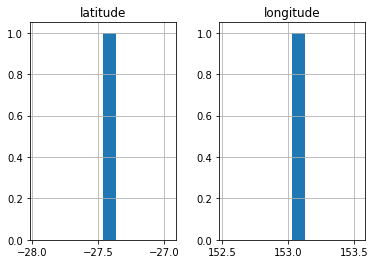

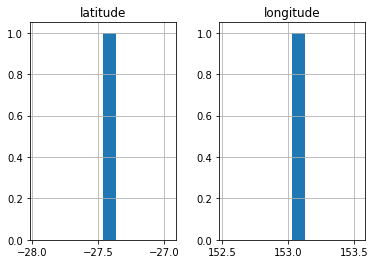

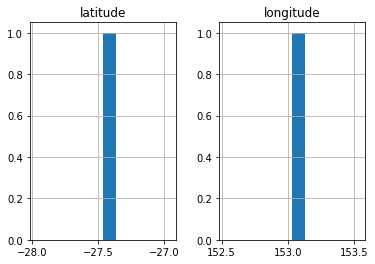

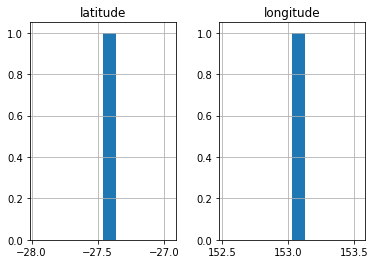

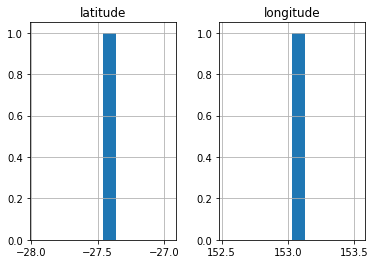

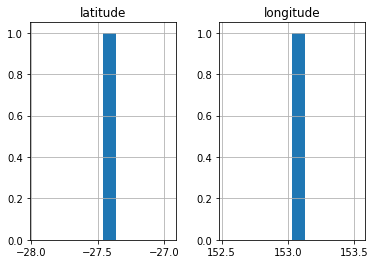

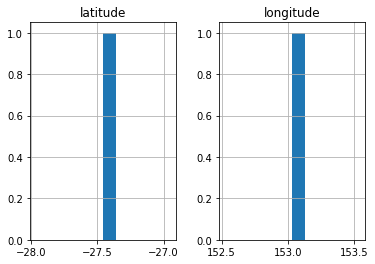

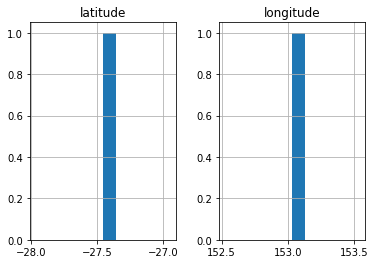

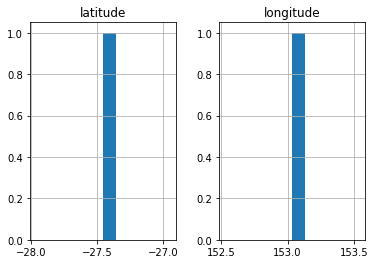

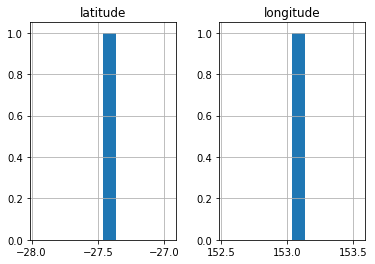

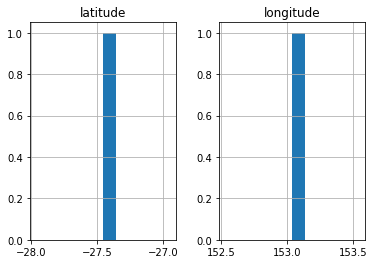

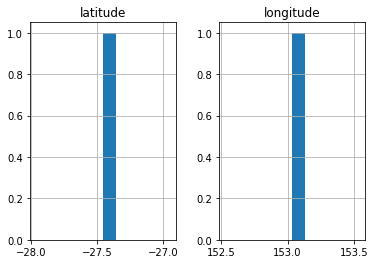

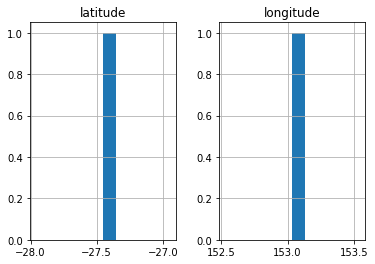

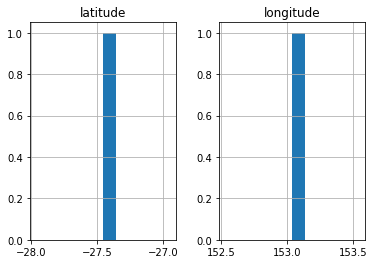

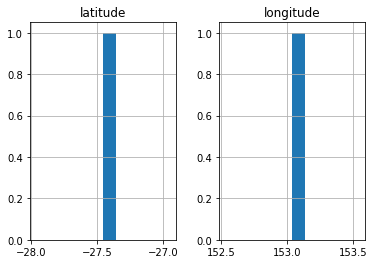

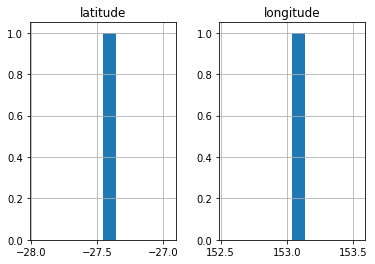

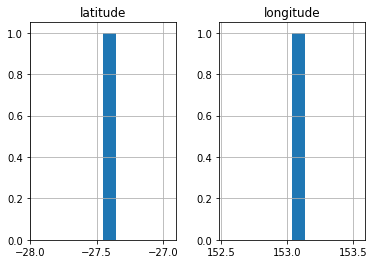

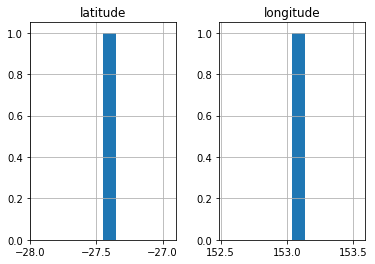

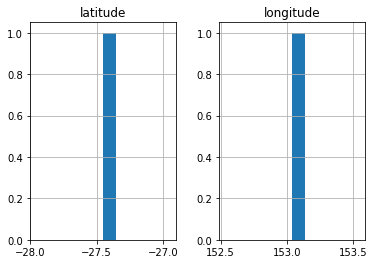

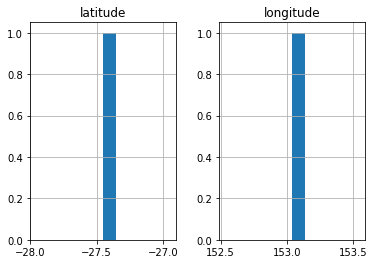

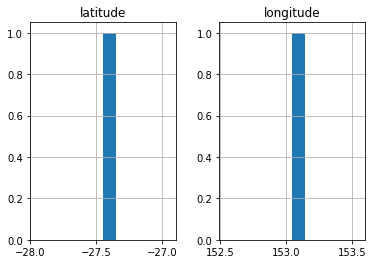

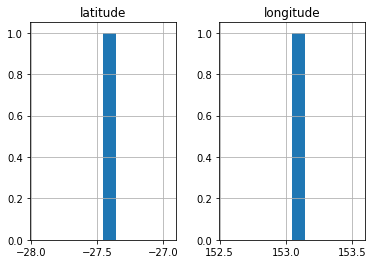

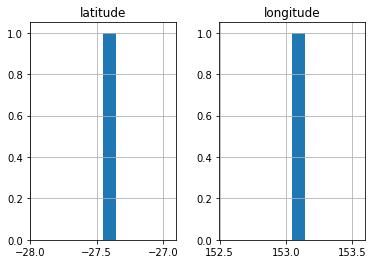

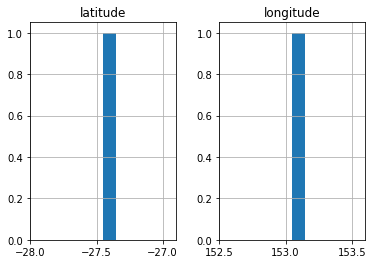

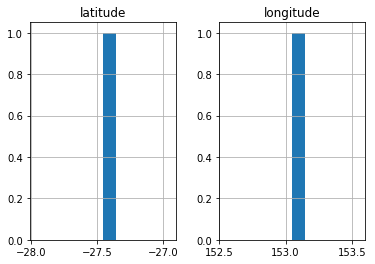

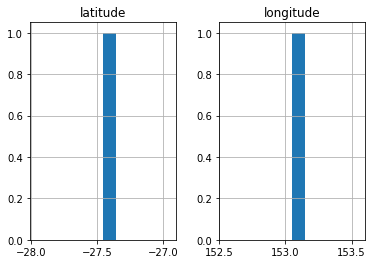

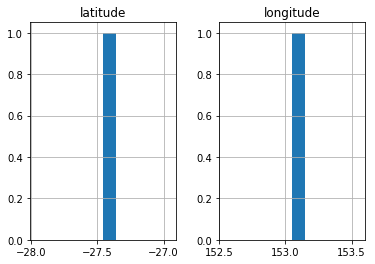

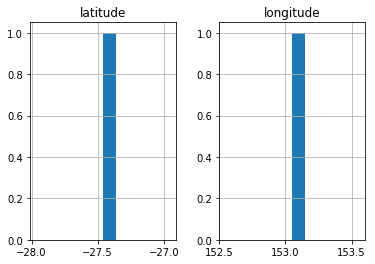

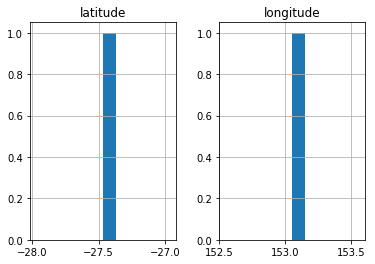

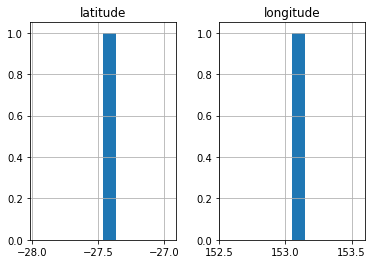

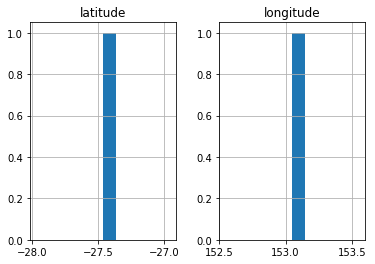

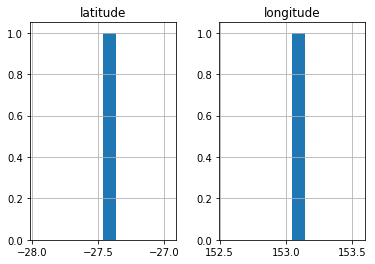

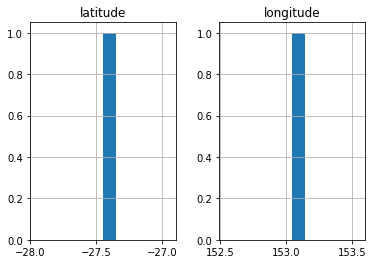

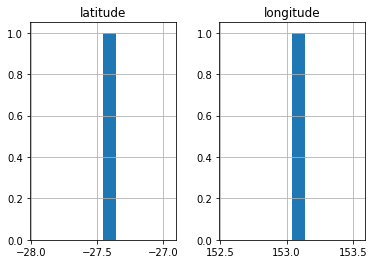

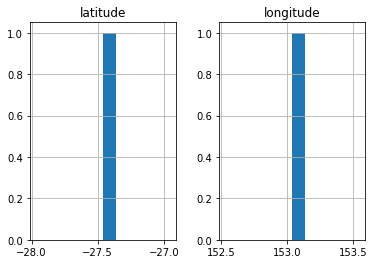

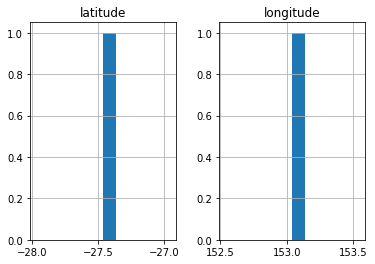

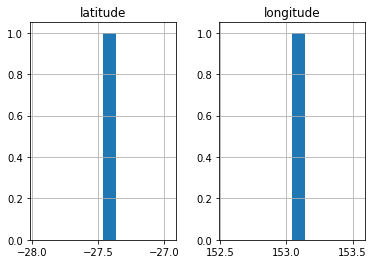

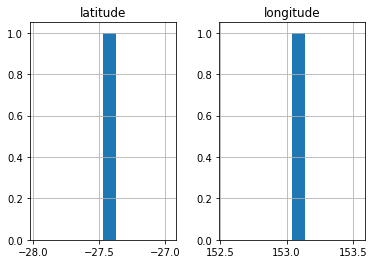

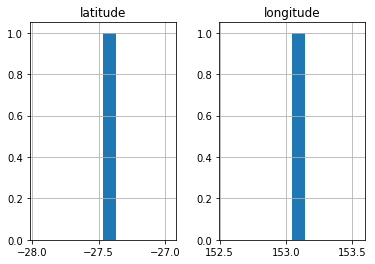

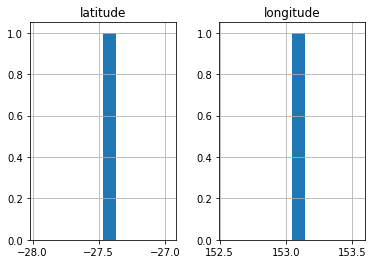

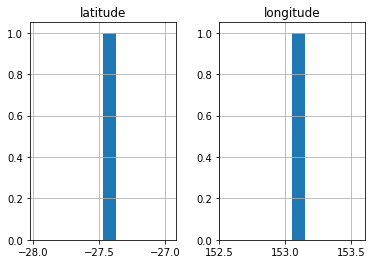

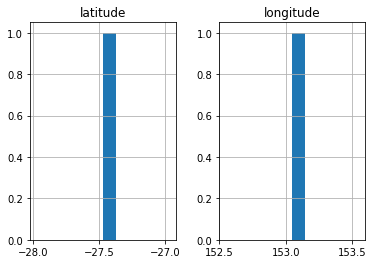

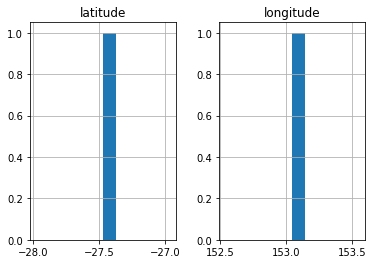

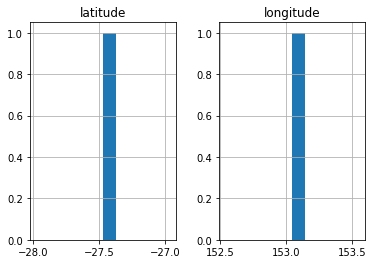

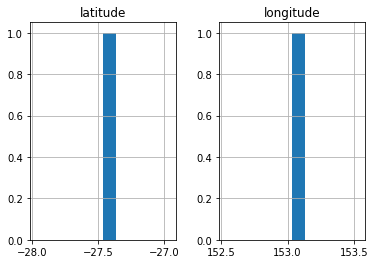

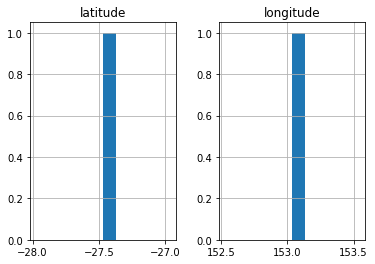

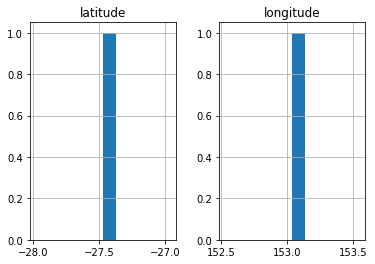

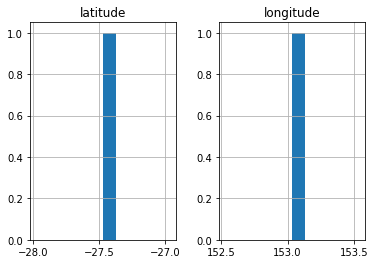

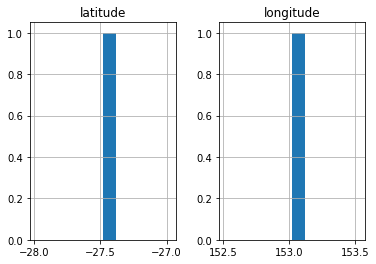

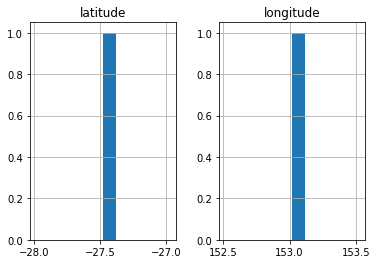

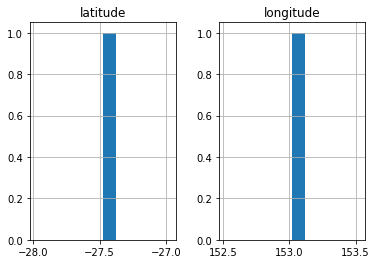

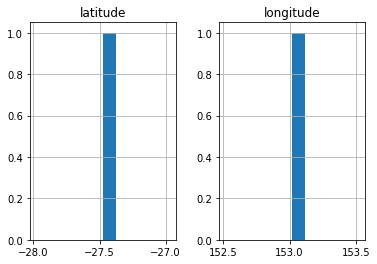

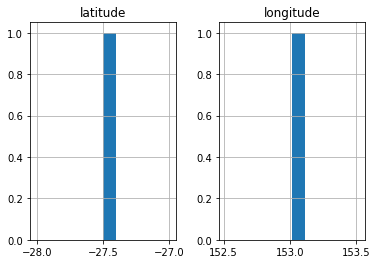

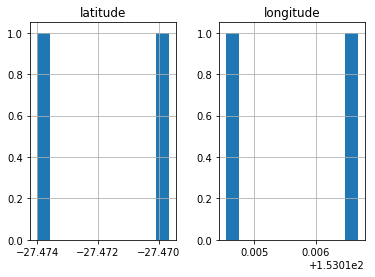

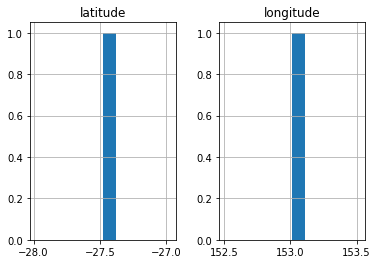

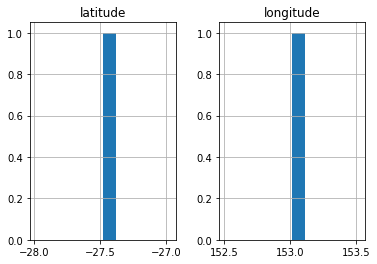

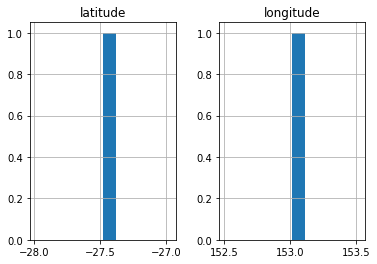

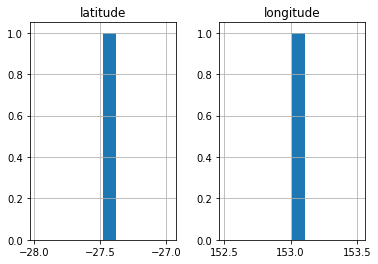

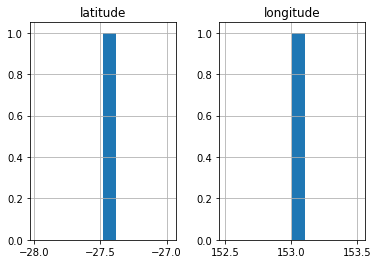

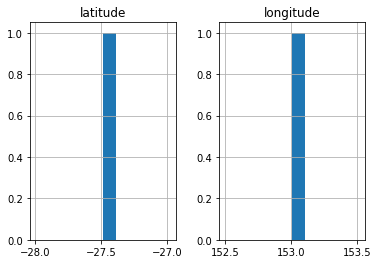

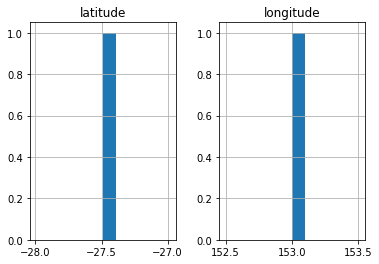

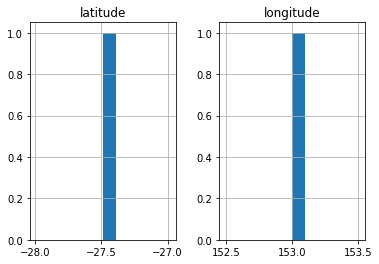

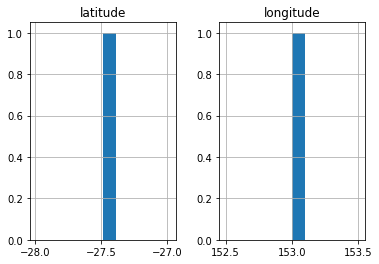

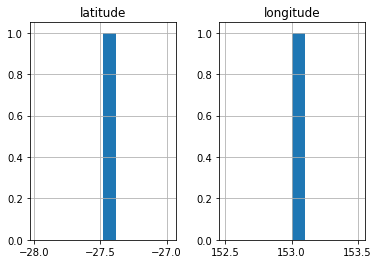

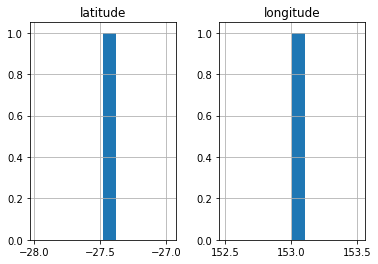

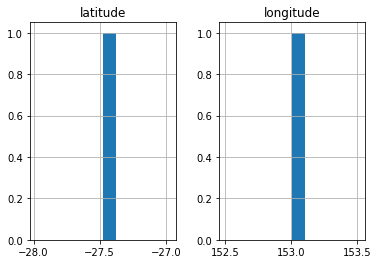

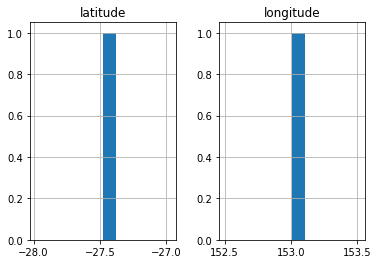

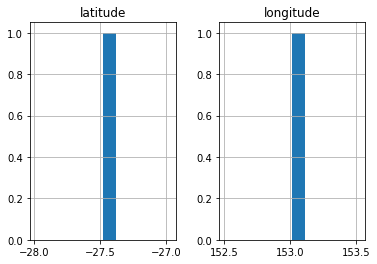

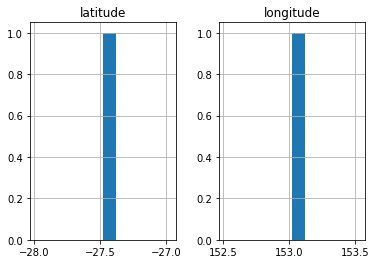

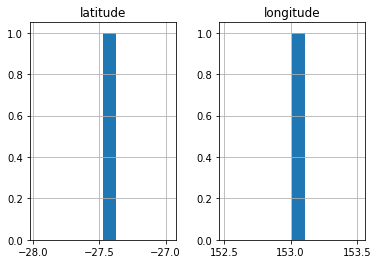

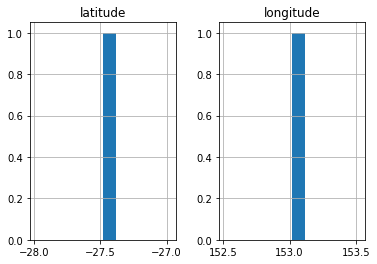

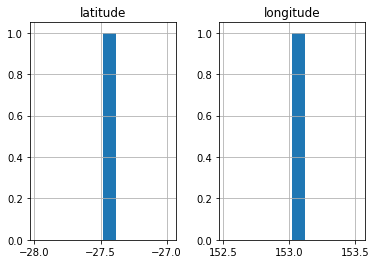

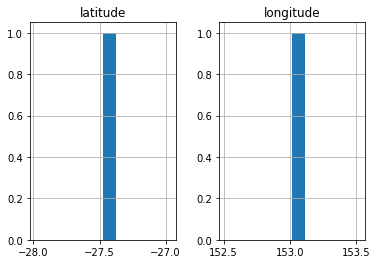

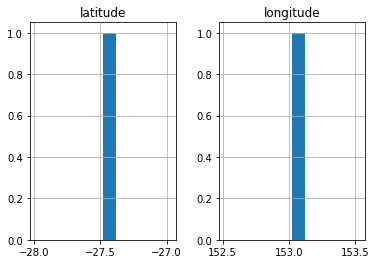

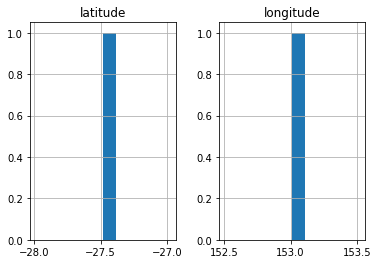

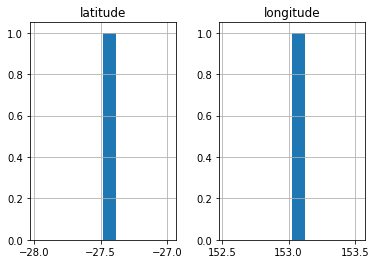

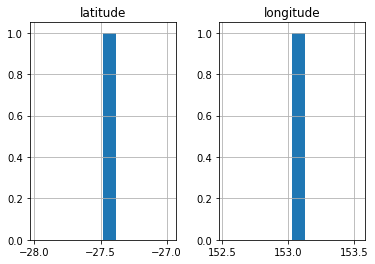

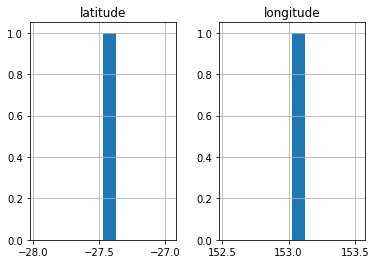

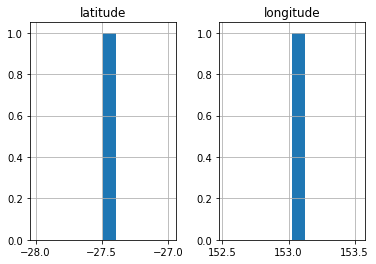

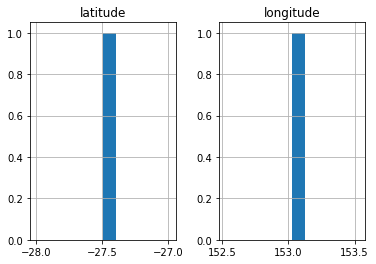

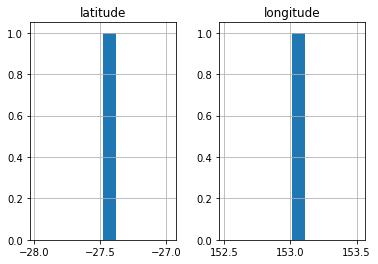

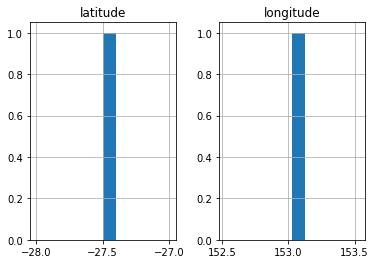

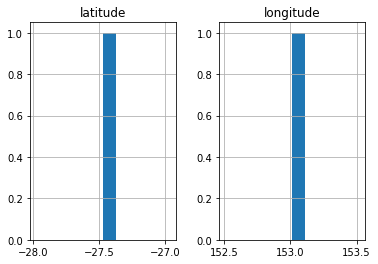

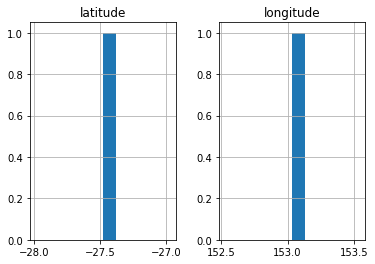

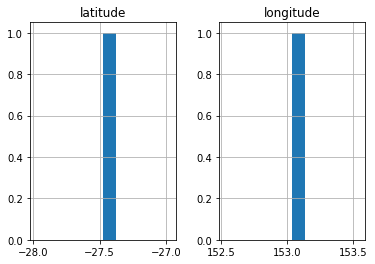

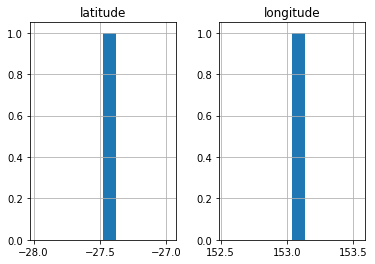

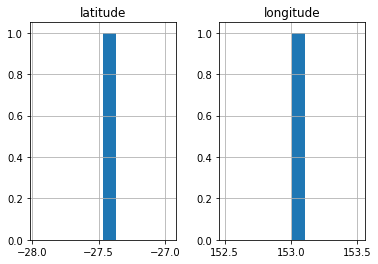

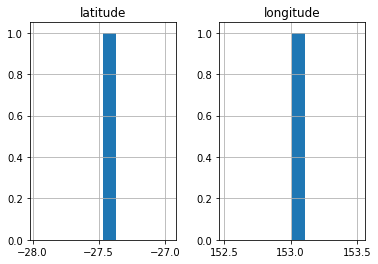

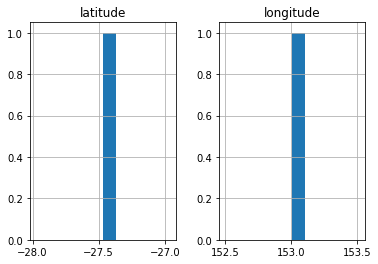

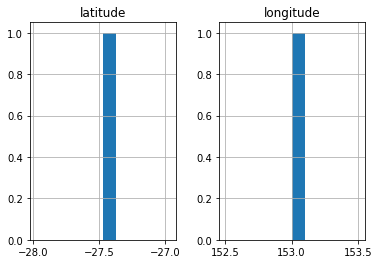

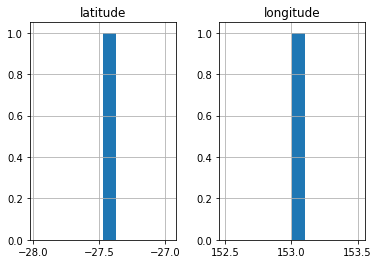

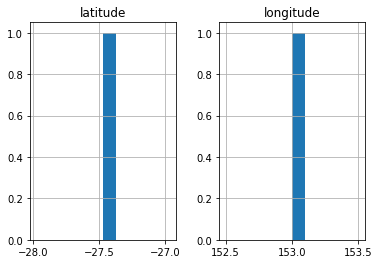

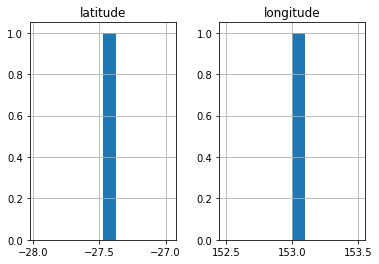

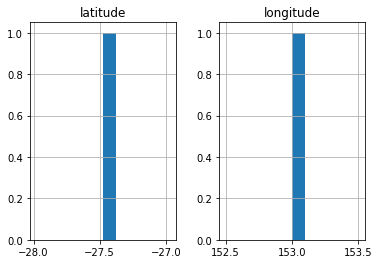

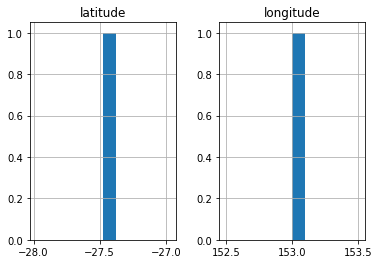

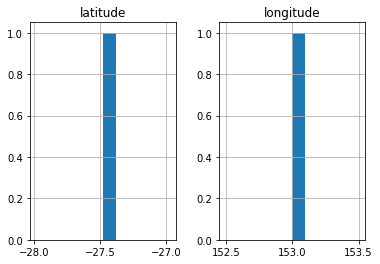

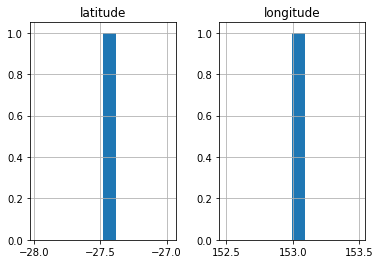

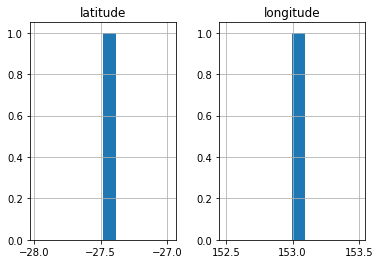

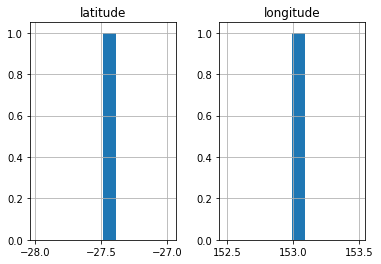

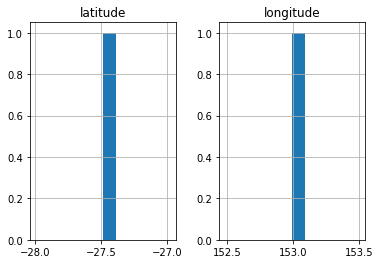

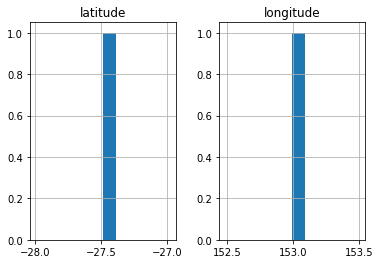

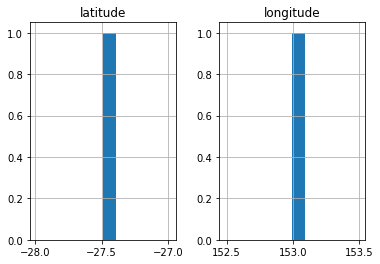

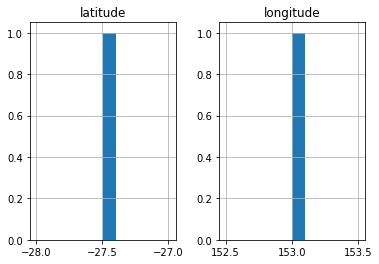

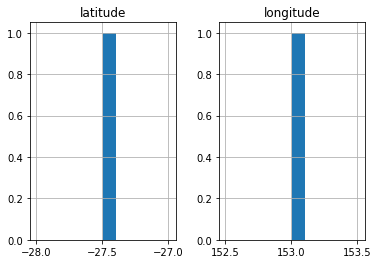

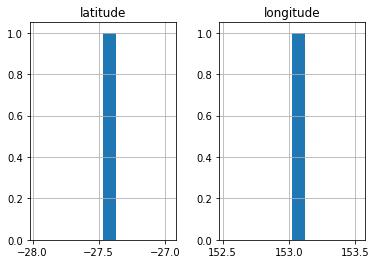

In [340]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure( figsize=(12,10) )

df_2.groupby(df_2.id)
#plt.show()